In [16]:
# Step 1: Import libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
# Load Titanic dataset:

import seaborn as sns
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
# Step 2: Explore dataset:

print("First 5 rows:\n", df.head())

print("\nDataset info:\n")
print(df.info())

print("\nMissing values per column:\n", df.isnull().sum())


First 5 rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  ----- 

In [19]:
# Step 3: Handle Missing Values:

# Numerical columns - fill with median

num_cols = df.select_dtypes(include=[np.number]).columns
imputer_median = SimpleImputer(strategy='median')
df[num_cols] = imputer_median.fit_transform(df[num_cols])

In [20]:
df[num_cols]

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000
887,1.0,1.0,19.0,0.0,0.0,30.0000
888,0.0,3.0,28.0,1.0,2.0,23.4500
889,1.0,1.0,26.0,0.0,0.0,30.0000


In [21]:
# Categorical columns - fill with mode

cat_cols = df.select_dtypes(include=['object', 'category']).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_mode.fit_transform(df[cat_cols])

In [22]:
df[cat_cols]

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,C,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,C,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,C,Southampton,no
...,...,...,...,...,...,...,...
886,male,S,Second,man,C,Southampton,no
887,female,S,First,woman,B,Southampton,yes
888,female,S,Third,woman,C,Southampton,no
889,male,C,First,man,C,Cherbourg,yes


In [23]:
# Step 4: Encode Categorical Features

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [24]:
df[col]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: alive, Length: 891, dtype: int64

In [25]:
# Step 5: Standardize Numerical Features

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [26]:
# Final Check:

print("\nProcessed dataset preview:\n", df.head())
print("\nDataset shape:", df.shape)


Processed dataset preview:
    survived    pclass  sex       age     sibsp     parch      fare  embarked  \
0 -0.789272  0.827377    1 -0.565736  0.432793 -0.473674 -0.502445         2   
1  1.266990 -1.566107    0  0.663861  0.432793 -0.473674  0.786845         0   
2  1.266990  0.827377    0 -0.258337 -0.474545 -0.473674 -0.488854         2   
3  1.266990 -1.566107    0  0.433312  0.432793 -0.473674  0.420730         2   
4 -0.789272  0.827377    1  0.433312 -0.474545 -0.473674 -0.486337         2   

   class  who  adult_male  deck  embark_town  alive  alone  
0      2    1        True     2            2      0  False  
1      0    2       False     2            0      1  False  
2      2    2       False     2            2      1   True  
3      0    2       False     2            2      1  False  
4      2    1        True     2            2      0   True  

Dataset shape: (891, 15)


In [27]:
# Select only numeric columns:

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'],
      dtype='object')

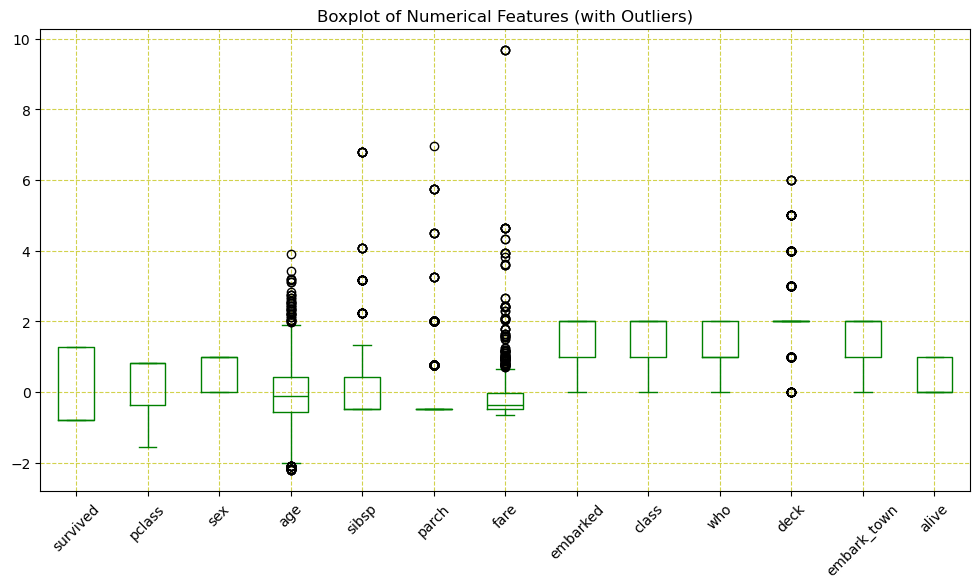

In [28]:
# Step 6: Visualize Outliers:

plt.figure(figsize=(12, 6))
df[num_cols].boxplot(color="green")
plt.grid(True,linestyle='--', alpha=0.7,color="y")
plt.title("Boxplot of Numerical Features (with Outliers)")
plt.xticks(rotation=45)
plt.show()

In [29]:
# Remove Outliers (IQR method):

def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df_clean = remove_outliers_iqr(df, num_cols)


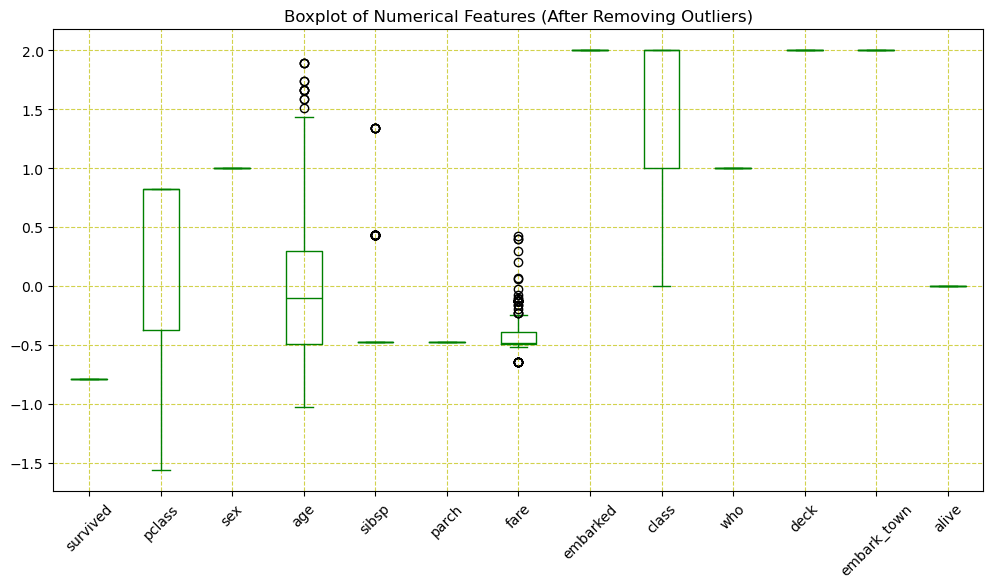

In [30]:
# Visualize After Cleaning:
# -------------------------------
plt.figure(figsize=(12, 6))
df_clean[num_cols].boxplot(color="g")
plt.title("Boxplot of Numerical Features (After Removing Outliers)")
plt.grid(True,linestyle='--', alpha=0.7,color="y")
plt.xticks(rotation=45)
plt.show()